In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글깨질 경우
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


In [2]:
train = pd.read_csv("./open-2/train.csv")
test = pd.read_csv("./open-2/test.csv")

In [4]:
# 데이터 확인
display(train.head(3))
display(test.head(3))

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TEST_000,서류확인,223000000.0,530000,NaN,5.0,5.0,남향,1.0,1.0,불가능,NaN,7,Z86Th6S3K5,D플랫폼,2024-10-21
1,TEST_001,서류확인,150500000.0,590000,30.26,7.0,11.0,서향,1.0,1.0,불가능,16.0,11,G52Iz8V2B9,D플랫폼,2023-09-02
2,TEST_002,현장확인,47000000.0,200000,41.50,2.0,3.0,남서향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-04-03


In [11]:
# 결측치 및 데이터 정보 확인
print(train.isnull().sum())
print("-----"*5)
print(train.dtypes)
print("-----"*5)
print(train.shape)
# 결측 데이터: 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수

ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      787
해당층       229
총층         16
방향          0
방수         16
욕실수        18
주차가능여부      0
총주차대수     696
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
허위매물여부      0
dtype: int64
-------------------------
ID         object
매물확인방식     object
보증금       float64
월세          int64
전용면적      float64
해당층       float64
총층        float64
방향         object
방수        float64
욕실수       float64
주차가능여부     object
총주차대수     float64
관리비         int64
중개사무소      object
제공플랫폼      object
게재일        object
허위매물여부      int64
dtype: object
-------------------------
(2452, 17)


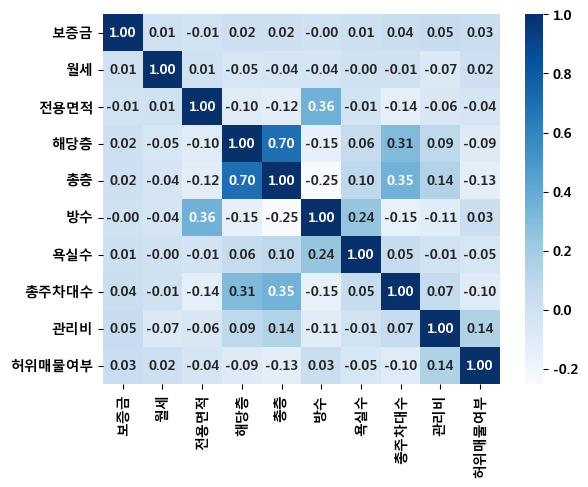

In [23]:
a = sns.heatmap(train.corr(numeric_only=True), cmap='Blues', annot=True, fmt=".2f")
plt.show(a)